# Import Libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from google.colab import files


# Load and Save Dataset


In [14]:

wine = load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target

df.to_csv("wine_dataset.csv", index=False)
files.download("wine_dataset.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Data Preprocessing

In [10]:
X = df.drop('target', axis=1).values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# KMeans with Built-in Function

In [11]:
start = time.time()
kmeans_builtin = KMeans(n_clusters=3, random_state=42)
labels_builtin = kmeans_builtin.fit_predict(X_scaled)
end = time.time()

builtin_inertia = kmeans_builtin.inertia_
builtin_silhouette = silhouette_score(X_scaled, labels_builtin)
builtin_time = end - start


# KMeans without Built-in Function

In [12]:
def custom_kmeans(X, k, max_iters=100):
    np.random.seed(42)
    centroids = X[np.random.choice(len(X), k, replace=False)]
    for _ in range(max_iters):
        distances = np.linalg.norm(X[:, None] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([X[labels==i].mean(axis=0) for i in range(k)])
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return labels, centroids

start = time.time()
labels_custom, centroids_custom = custom_kmeans(X_scaled, 3)
end = time.time()

custom_inertia = sum(np.min(np.linalg.norm(X_scaled[:, None] - centroids_custom, axis=2), axis=1)**2)
custom_silhouette = silhouette_score(X_scaled, labels_custom)
custom_time = end - start


# Performance Comparison & Visualization

=== Built-in KMeans ===
Inertia (WCSS): 1277.9285
Silhouette Score: 0.2849
Execution Time: 0.005183 sec

=== Custom KMeans ===
Inertia (WCSS): 1277.9285
Silhouette Score: 0.2849
Execution Time: 0.004289 sec


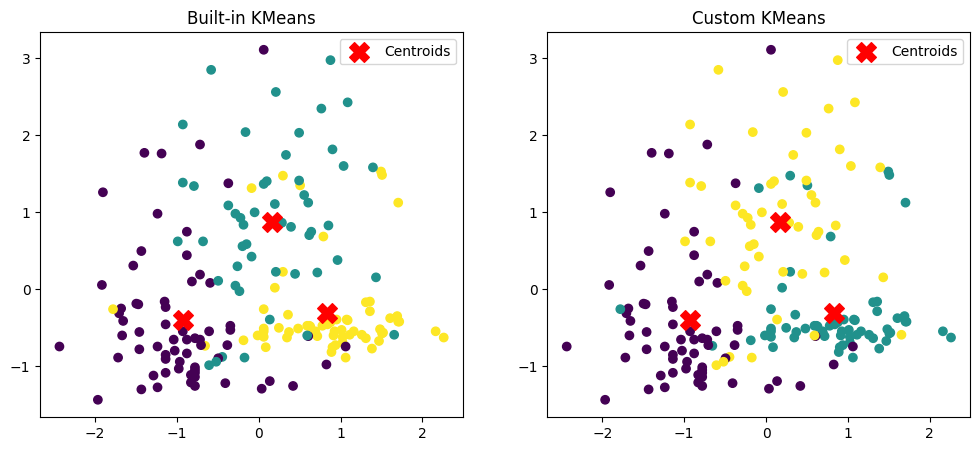

In [15]:
print("=== Built-in KMeans ===")
print(f"Inertia (WCSS): {builtin_inertia:.4f}")
print(f"Silhouette Score: {builtin_silhouette:.4f}")
print(f"Execution Time: {builtin_time:.6f} sec\n")

print("=== Custom KMeans ===")
print(f"Inertia (WCSS): {custom_inertia:.4f}")
print(f"Silhouette Score: {custom_silhouette:.4f}")
print(f"Execution Time: {custom_time:.6f} sec")


fig, axs = plt.subplots(1, 2, figsize=(12,5))

axs[0].scatter(X_scaled[:,0], X_scaled[:,1], c=labels_builtin, cmap='viridis')
axs[0].scatter(kmeans_builtin.cluster_centers_[:,0], kmeans_builtin.cluster_centers_[:,1],
               c='red', marker='X', s=200, label='Centroids')
axs[0].set_title("Built-in KMeans")
axs[0].legend()

axs[1].scatter(X_scaled[:,0], X_scaled[:,1], c=labels_custom, cmap='viridis')
axs[1].scatter(centroids_custom[:,0], centroids_custom[:,1],
               c='red', marker='X', s=200, label='Centroids')
axs[1].set_title("Custom KMeans")
axs[1].legend()

plt.show()
